In [ ]:
import pandas as pd 
df = pd.read_csv('Data\qws1.txt', sep=',', header=None, on_bad_lines='skip')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\q'
<>:2: SyntaxWarning: invalid escape sequence '\q'
C:\Users\egomes\AppData\Local\Temp\ipykernel_1236\754752696.py:2: SyntaxWarning: invalid escape sequence '\q'
  df = pd.read_csv('Data\qws1.txt', sep=',', header=None, on_bad_lines='skip')


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


In [ ]:
new_columns = [
    "Response Time",
    "Availability",
    "Throughput",
    "Successability",
    "Reliability",
    "Compliance",
    "Best Practices",
    "Latency",
    "Documentation",
    "WsRF",
    'Class',
    "Service Name",
    "WSDL Address"
]

# Renomear as colunas
df.columns = new_columns

In [ ]:
df.head()

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


---Pre Processing---

In [ ]:
df.drop(columns=['WsRF',"Service Name", "WSDL Address"], inplace=True) #wsrf dá leakage

In [ ]:
df.head()

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,Class
0,45.00,83,27.2,50,97.4,89,91,43.00,58,1
1,71.75,100,14.6,88,85.5,78,80,64.42,86,1
2,117.00,100,23.4,83,88.0,100,87,111.00,59,1
3,70.00,100,5.4,83,79.3,100,75,63.00,91,1
4,105.20,100,18.2,80,92.2,78,84,104.60,91,1


In [ ]:
df['Class'].value_counts()

Class
3    120
4    103
2    100
1     41
Name: count, dtype: int64

In [ ]:
'''
from sklearn.model_selection import train_test_split
#Separate features and target variable for train data
train_features = df.drop(columns=['Class'])
train_target = df['Class']

#Label encoding the target variable
train_target=train_target-1  # Adjust target to start from 0

#Separate features and target variable for test data    
test_features = df.drop(columns=['Class'])
test_target = df['Class']

#Label encoding the target variable
test_target=test_target-1  # Adjust target to start from 0
'''

In [ ]:
features=df.drop(columns=['Class'])
target=df['Class']
target=target-1
target

0      0
1      0
2      0
3      0
4      0
      ..
359    3
360    3
361    3
362    3
363    3
Name: Class, Length: 364, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Separar o conjunto de dados em treino (70%) e teste (30%)
train_features,test_features,train_target,test_target = train_test_split(features,target, test_size=0.3, random_state=42)

In [ ]:
from sklearn import preprocessing



#Create Scaler in train data
scaler = preprocessing.StandardScaler().fit(train_features)

#Scale the features
train_scaled_features=scaler.transform(train_features)
test_scaled_features=scaler.transform(test_features)

In [ ]:
'''
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)
'''

In [ ]:
train_features

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation
268,242.75,78,7.1,44,58.0,67,84,124.00,38
232,117.25,100,0.8,78,70.9,78,65,115.50,4
157,891.66,100,7.5,75,48.3,78,77,419.33,92
19,129.67,100,13.2,86,84.1,78,80,129.56,90
147,110.00,86,6.5,57,75.9,78,84,105.00,38
...,...,...,...,...,...,...,...,...,...
71,144.00,100,24.7,57,90.2,78,93,143.50,3
106,624.75,100,0.2,88,69.6,78,80,161.00,90
270,23365.00,99,0.9,67,63.3,78,84,23341.00,41
348,1126.25,67,3.5,33,59.4,78,72,1107.00,1


---Model---

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_features, train_target)


# Fazer previsões no conjunto de teste
predictions = model.predict(test_features)
probabilities = model.predict_proba(test_features)[:, 1]




In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Avaliar o modelo
accuracy = accuracy_score(test_target, predictions)
confusion_matrix_res = confusion_matrix(test_target, predictions)
report = classification_report(test_target, predictions)

# Exibir resultados
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix_res)
print("\nReport:\n", report)

# Mostrar algumas previsões
print("\nFirst 10 predictions:", predictions[:10]+1)

#5. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(test_target, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.8272727272727273

Confusion Matrix:
 [[ 7  7  0  0]
 [ 1 29  4  0]
 [ 0  3 23  2]
 [ 0  0  2 32]]

Report:
               precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.74      0.85      0.79        34
           2       0.79      0.82      0.81        28
           3       0.94      0.94      0.94        34

    accuracy                           0.83       110
   macro avg       0.84      0.78      0.79       110
weighted avg       0.83      0.83      0.82       110


First 10 predictions: [3 2 1 4 2 3 2 2 2 2]


ValueError: multiclass format is not supported

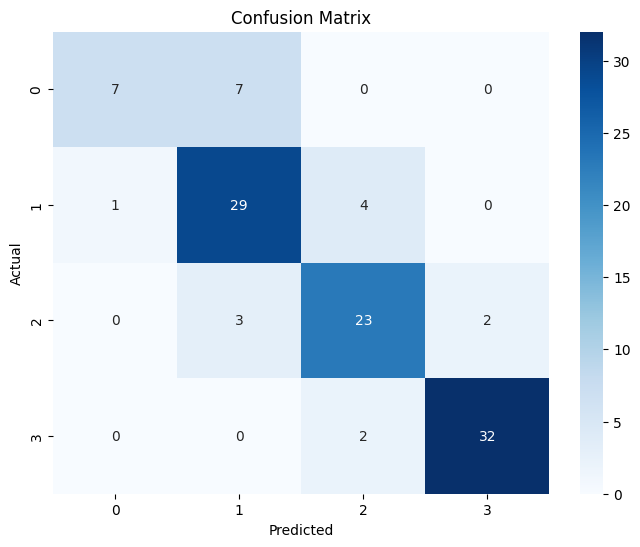

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.74      0.85      0.79        34
           2       0.79      0.82      0.81        28
           3       0.94      0.94      0.94        34

    accuracy                           0.83       110
   macro avg       0.84      0.78      0.79       110
weighted avg       0.83      0.83      0.82       110



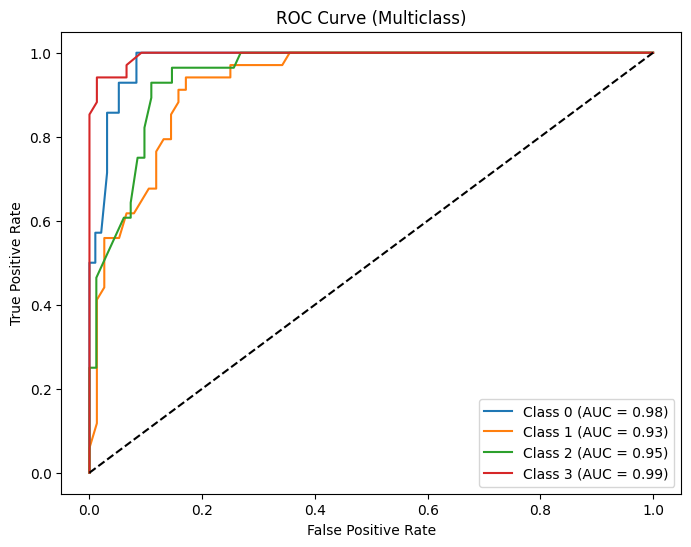

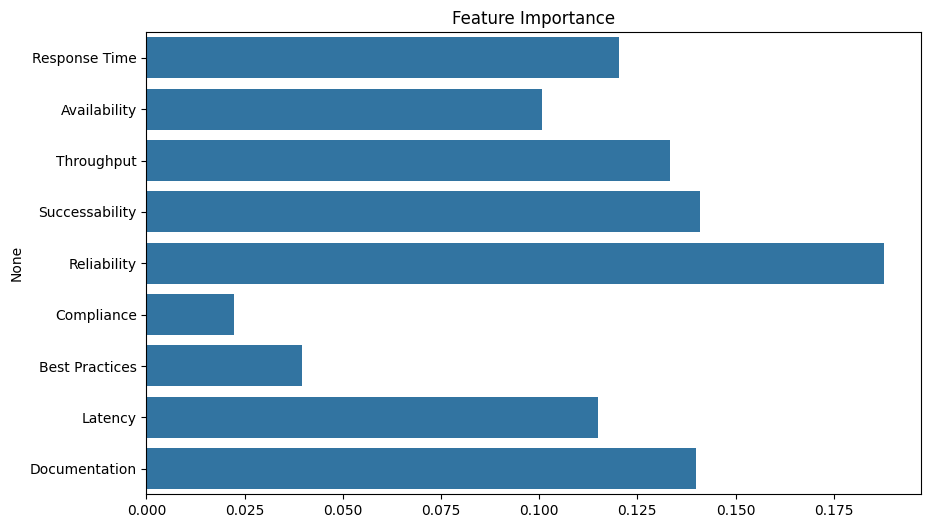

In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize



# 5. ROC Curve for Multiclass
classes = model.classes_
y_test_bin = label_binarize(test_target, classes=classes)
n_classes = len(classes)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# 6. Feature Importance (optional)
importances = model.feature_importances_
feature_names = train_features.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

